# Analysis: 20251104

In [ ]:
!pip install nucleus-cdk | tail -n2

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from cdk.analysis.cytosol import platereader as pr

# Initialize plotting
pr.plot_setup()

# Load the data

Provide a CSV file containing the data, and a platemap. This function returns both the data with the plate map mapped to it, and the platemap by itself, which is useful for certain tasks.

In [12]:
data_file = "./20251104-cytation3-pure-timecourse-gfp-NucleusPURE_deGFP-biotek-cdk.txt"
platemap_file = "./20251104-NucleusPURE-deGFP-platemap.csv"

data, platemap = pr.load_platereader_data(data_file, platemap_file)

# Basic Analysis

## Curves
Curves of RFU over time, by named sample.

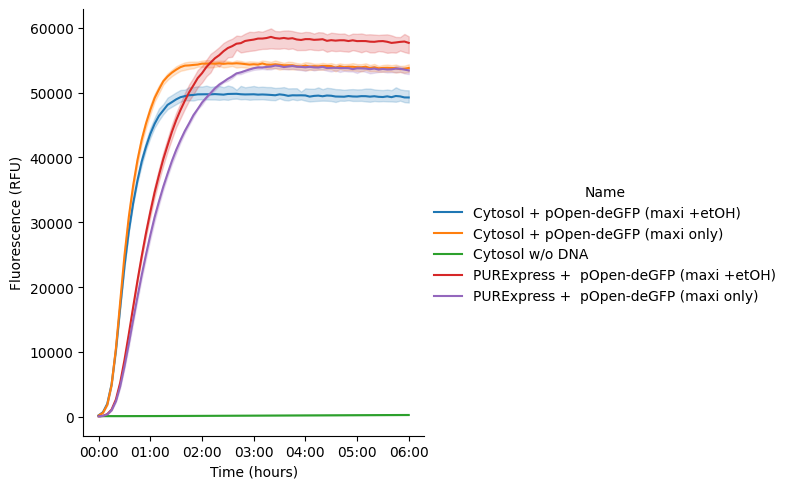

In [13]:
#| label: fig:kinetics-exp1

K=pr.plot_curves(data)
K.savefig('Kinetics')

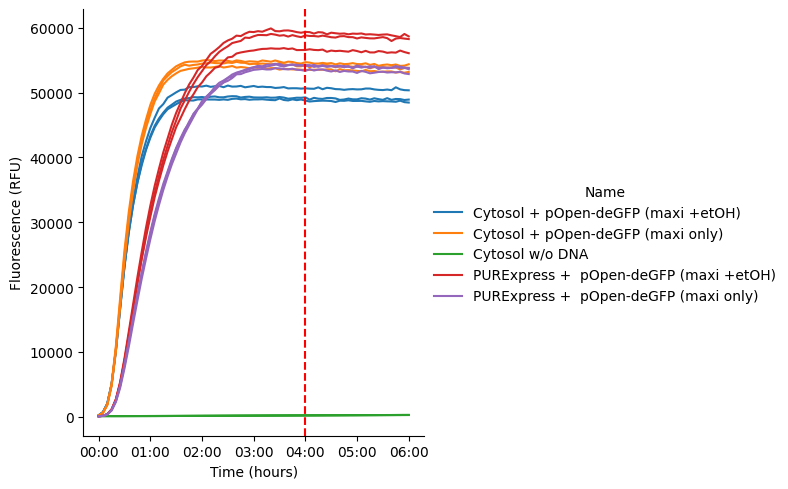

In [14]:
K2=pr.plot_curves(data, units="Well", estimator=None)
K2.axes.flatten()[0].axvline(pd.to_timedelta("04:00:00"), c="red", ls="--")
K2.savefig('Kinetics2')

## Steady state
Bar graph of steady-state endpoint of each sample. Steady state is calculated as the maximum fluorescence value over a 3-sample rolling average on the data.

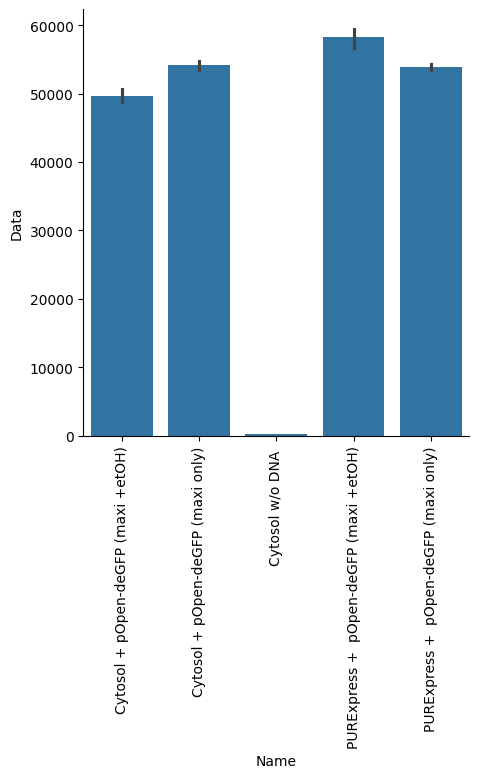

In [15]:
#| label: fig:endpoint-exp1

g = sns.catplot(
    data=data[data["Time"] == "04:00:00"],
    x="Name",
    y="Data",
    kind="bar"
)

g.set_xticklabels(rotation=90)
g.savefig('Steadystate')

/opt/conda/lib/python3.13/site-packages/cdk/analysis/cytosol/platereader.py:689: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = data.groupby(["Well", "Read"]).apply(find_steady_state_for_well)


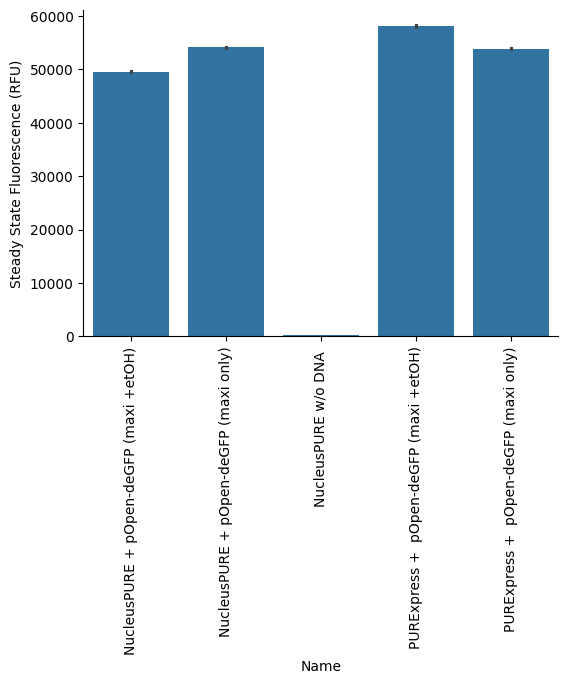

In [4]:
S= pr.plot_steadystate(data)
S.savefig('endpoint')

## Kinetics
These functions calculate key kinetic parameters of the time series.

/opt/conda/lib/python3.13/site-packages/cdk/analysis/cytosol/platereader.py:807: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kinetics = data.groupby(group_by, sort=False).apply(


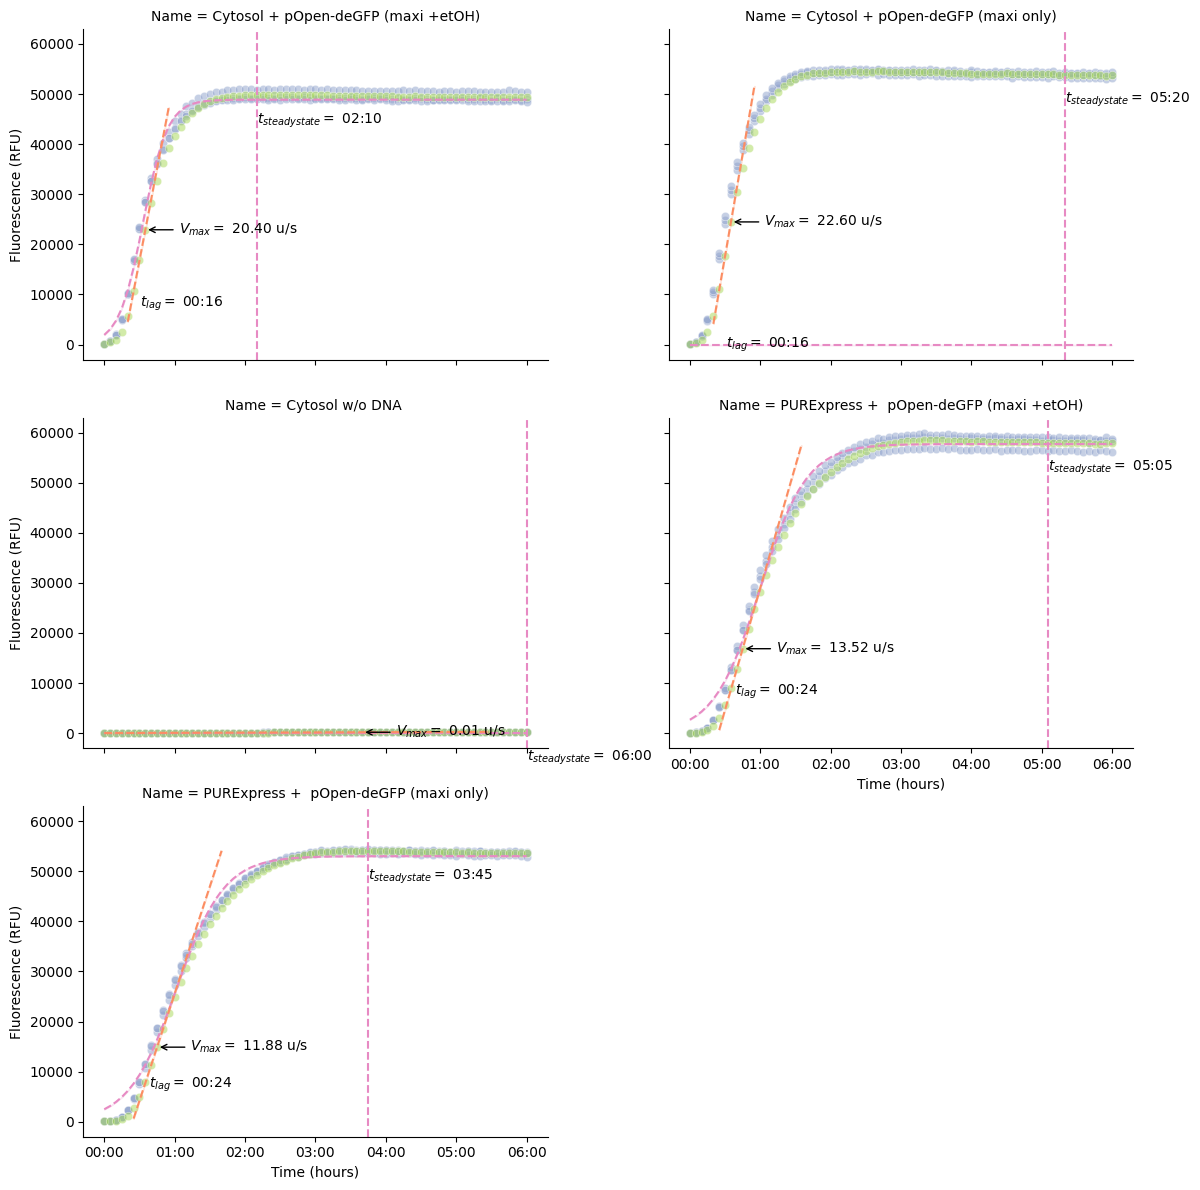

In [16]:
pr.plot_kinetics(data)

We can also calculate the kinetics and display the parameters as a table.

In [9]:
pr.kinetic_analysis(data)

Velocity                 \
                                                        Time     Data   Max   
Name                                                                          
PURE 1 + ES (11.8mM Mg + 30 mM CP) + 2%PEG   0 days 01:35:14 10641.00  4.52   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-1 0 days 02:15:14 33368.33  9.76   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-2 0 days 02:20:14 26377.67  7.42   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-3 0 days 02:35:14 14637.00  3.68   
PURExpress PC                                0 days 01:25:14 31047.33 16.68   

                                                                   Lag  \
                                                                  Time   
Name                                                                     
PURE 1 + ES (11.8mM Mg + 30 mM CP) + 2%PEG   0 days 00:56:01.531319086   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-1 0 days 01:18:14.724126153   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-2 0 days 01:20:58.525984723   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-3 0 days 01:29:01.352231604   
PURExpress PC                                0 days 00:54:12.731737644   

                                                         Steady State  \
                                                 Data            Time   
Name                                                                    
PURE 1 + ES (11.8mM Mg + 30 mM CP) + 2%PEG    3511.20 0 days 05:55:14   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-1 10623.36 0 days 05:50:14   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-2  8273.40 0 days 05:50:14   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-3  4394.39 0 days 05:40:14   
PURExpress PC                                11360.84 0 days 05:30:14   

                                                            Fit                \
                                                  Data        L    k       x0   
Name                                                                            
PURE 1 + ES (11.8mM Mg + 30 mM CP) + 2%PEG    26526.11 25497.92 0.00  6146.88   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-1 100380.67 97779.36 0.00  9686.66   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-2  77243.00 75438.24 0.00  9914.31   
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-3  36507.67 36090.20 0.00 10237.86   
PURExpress PC                                 84208.78 81608.97 0.00  5675.61   

                                                   
                                              R^2  
Name                                               
PURE 1 + ES (11.8mM Mg + 30 mM CP) + 2%PEG   0.99  
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-1 1.00  
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-2 1.00  
PURE 2 + ES (11.8mM Mg + 30 mM CP) + 2%PEG-3 1.00  
PURExpress PC                                0.99